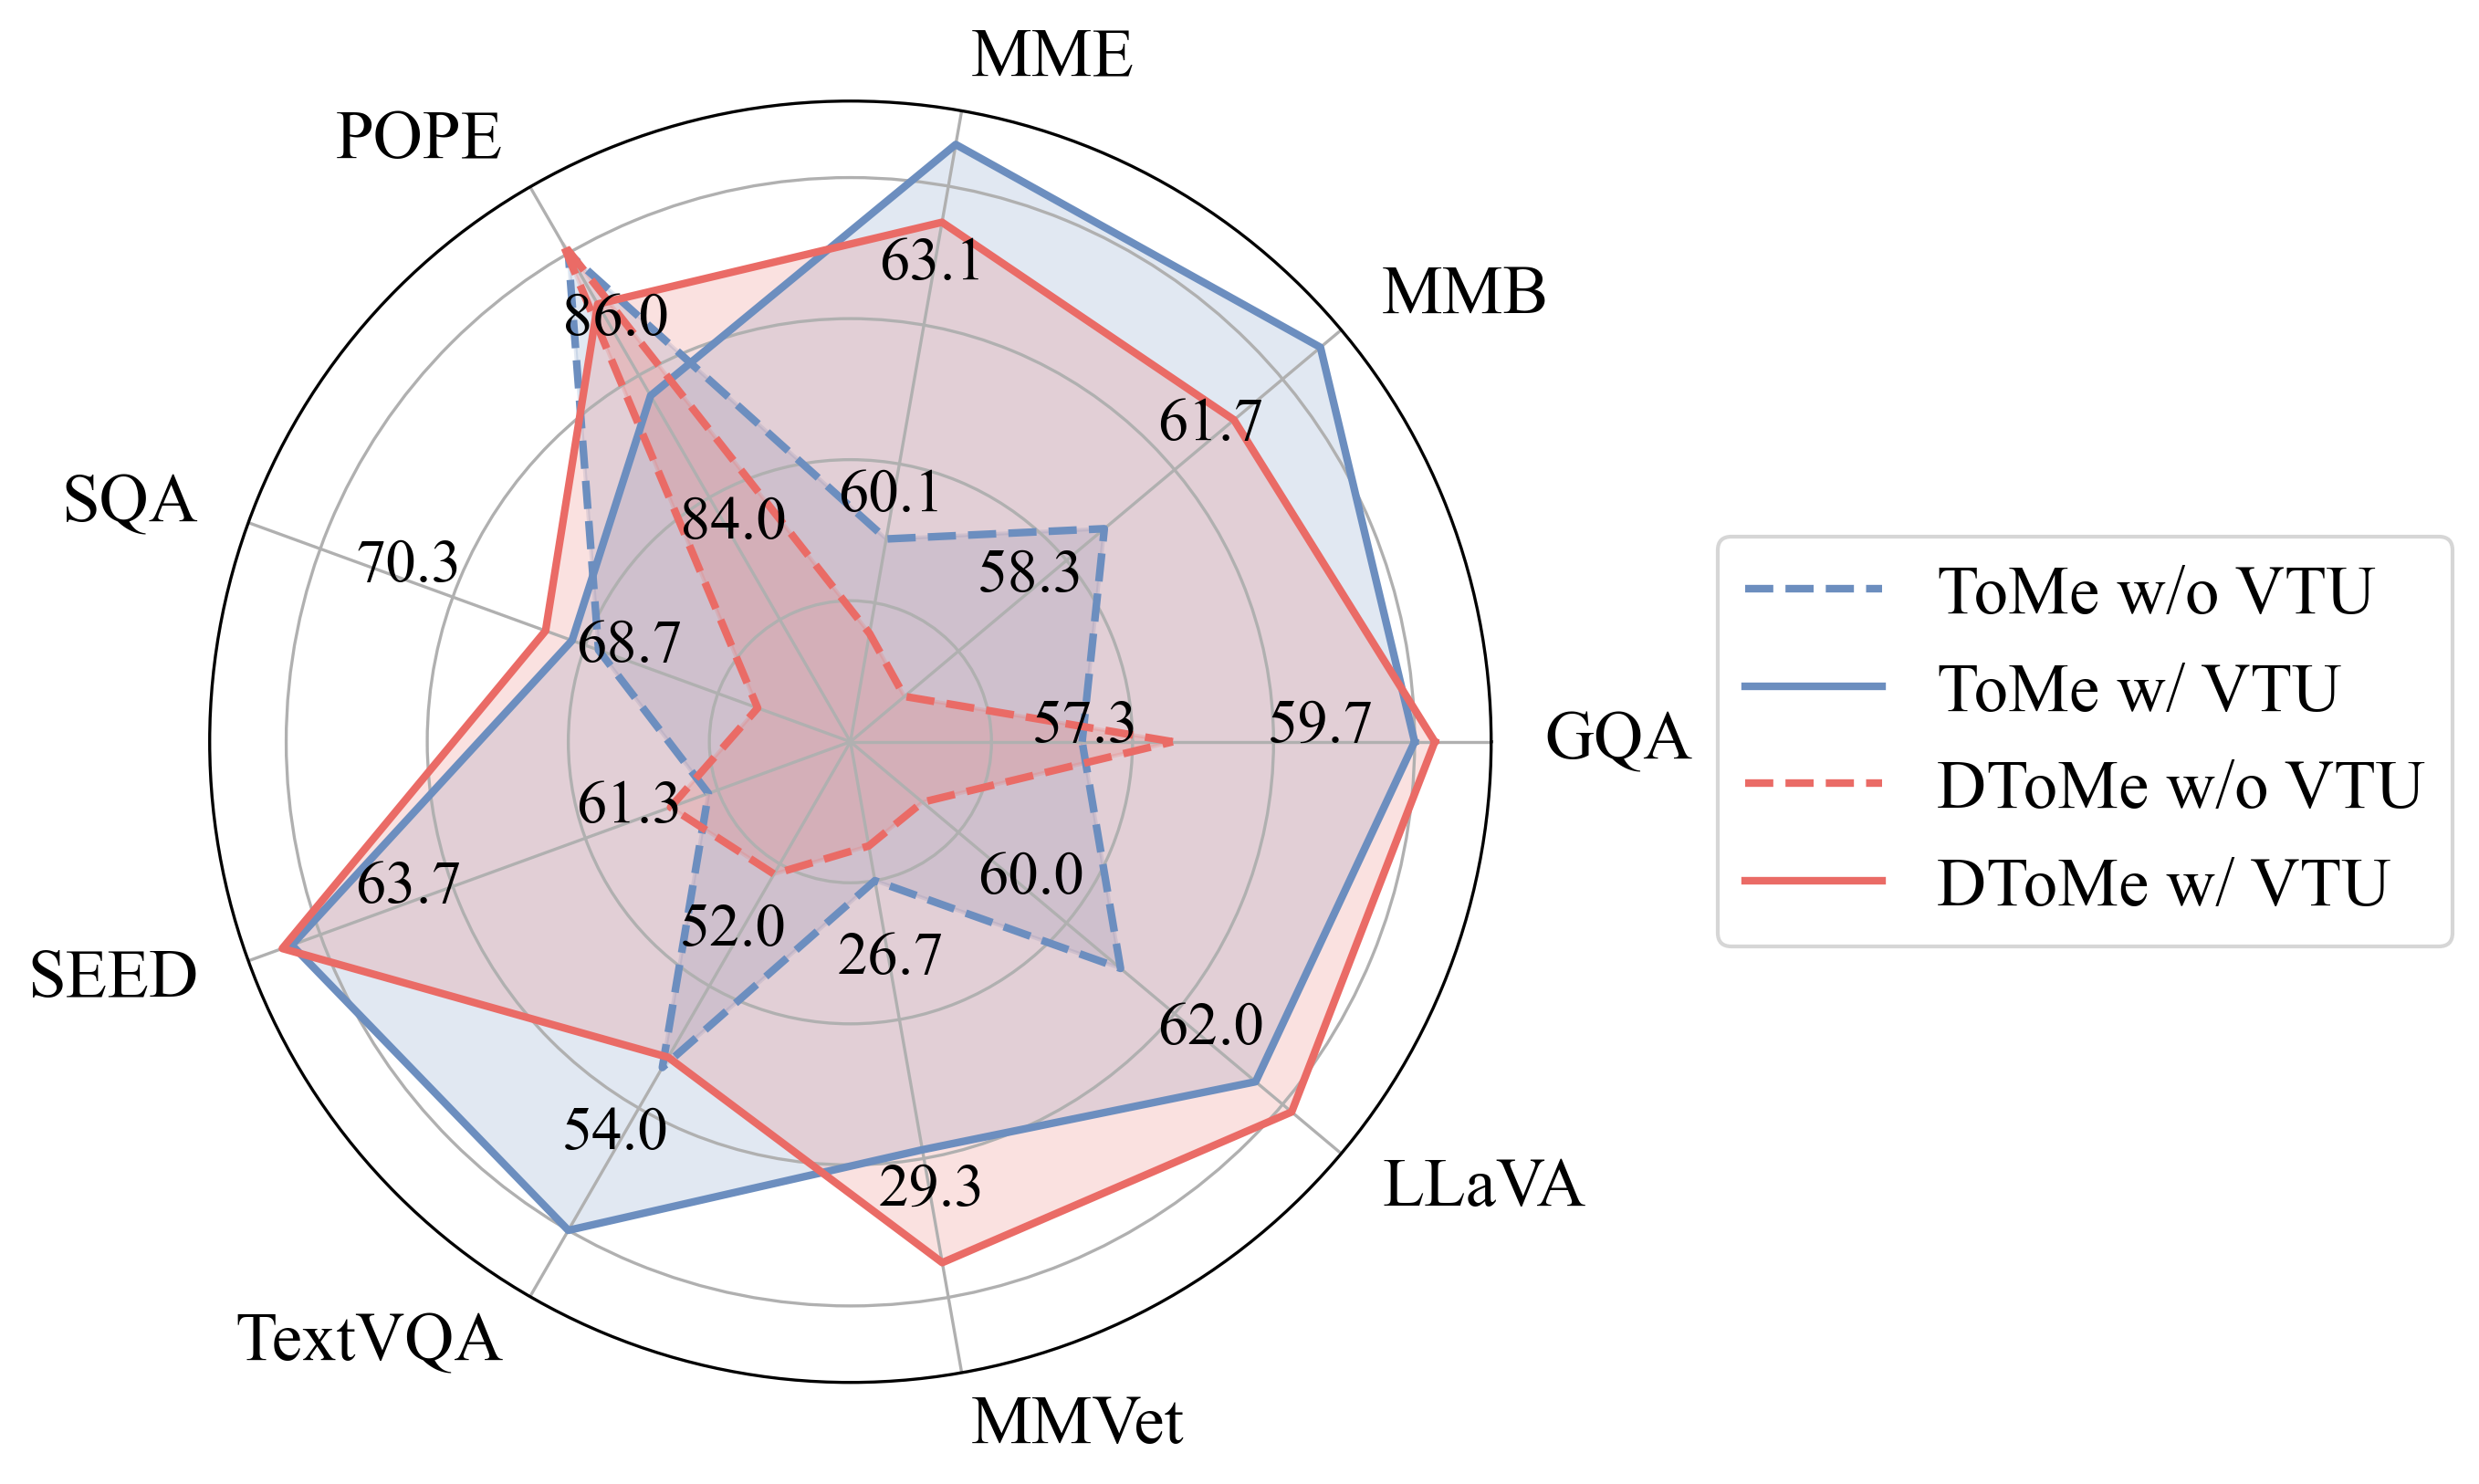

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

colors = {
    "ToMe": "#6C8EBF",
    "DyMU": "#EA6B66",
    "DToMe": "#EA6B66",
}

def plot_radar_chart(data, labels, method_labels, tick_ranges, title="Benchmark Performance"):
    num_vars = len(labels)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]  # Close the radar chart

    # Normalize each benchmark axis independently
    normalized_data = {}
    for method, scores in data.items():
        normalized_scores = [
            (scores[i] - tick_ranges[i][0]) / (tick_ranges[i][1] - tick_ranges[i][0])
            for i in range(num_vars)
        ]
        normalized_data[method] = normalized_scores

    fig, ax = plt.subplots(figsize=(8, 6.5), subplot_kw=dict(polar=True), dpi=300)
    
    model_colors = colors
    line_styles = {
        "w/o VTU": "dashed",
        "w/ VTU": "solid"
    }

    for method, scores in normalized_data.items():
        model_name = "ToMe" if ("ToMe" in method and "DToMe" not in method) else "DyMU"
        linestyle = line_styles["w/ VTU"] if "w/ VTU" in method else line_styles["w/o VTU"]
        
        scores += scores[:1]  # Close the shape
        ax.plot(angles, scores, linewidth=2, linestyle=linestyle, label=method, color=model_colors[model_name])
        ax.fill(angles, scores, alpha=0.2, color=model_colors[model_name])

    # Set axis labels
    ax.set_xticks(angles[:-1])
    # Initially set the labels without rotation
    ax.set_xticklabels(labels, fontsize=18, fontname="Times New Roman")

    # Rotate each label to be orthogonal to the radius
    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        angle_deg = np.degrees(angle)
        # The label should be rotated by the angle plus 90° to be orthogonal (tangent to the circle)
        rotation = angle_deg + 90
        # Adjust rotation so that labels remain upright
        if rotation > 180:
            rotation -= 360
        label.set_rotation(rotation)
        # Adjust horizontal alignment for readability
        if angle_deg >= 90 and angle_deg <= 270:
            label.set_horizontalalignment('right')
        else:
            label.set_horizontalalignment('left')

    # Remove default y-ticks
    ax.set_yticklabels([])

    # Custom tick labels at corresponding angles for radial ticks
    for i, angle in enumerate(angles[:-1]):
        min_val, max_val = tick_ranges[i]
        tick_labels = np.linspace(min_val, max_val, num=4)
        tick_positions = (tick_labels - min_val) / (max_val - min_val)
        for t, p in zip(tick_labels, tick_positions):
            if p - 0 < 0.05 or 1 - p < 0.05:
                continue
            ax.text(angle, p, f"{t:.1f}", horizontalalignment='center', fontsize=16, fontname="Times New Roman")

    # Custom legend
    # legend = ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=16)
    # legend = ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.05), fontsize=16)
    legend = ax.legend(
        loc='center left',
        # loc='upper right',
        bbox_to_anchor=(1.15, 0.5),
        fontsize=18
    )
    for text in legend.get_texts():
        text.set_fontname("Times New Roman")

    plt.tight_layout()
    plt.savefig("radar_vtu.pdf", format='pdf', bbox_inches='tight')
    plt.show()

# Benchmark labels
labels = ["GQA", "MMB", "MME", "POPE", "SQA", "SEED", "TextVQA", "MMVet", "LLaVA"]

data = {
    "ToMe w/o VTU": [57.3, 59.7, (1673/2800) * 100, 86.8, 68.9, 60.5, 53.2, 25.6, 61.0],
    "ToMe w/ VTU": [60.6, 63.7, (1815/2800) * 100, 85.4, 69.1, 64.9, 54.8, 28.7, 62.5],
    "DToMe w/o VTU": [58.2, 56.0, (1639/2800) * 100, 86.9, 67.7, 60.9, 51.3, 25.2, 58.8],
    "DToMe w/ VTU": [60.8, 62.1, (1787/2800) * 100, 86.3, 69.3, 65.0, 53.1, 30.0, 62.9],
}

tick_ranges = [
    (55, 62),         # GQA
    (55, 65),         # MMB
    (1600/2800*100, 1850/2800*100),  # MME (normalized to percentage)
    (82, 88),         # POPE
    (67, 72),         # SQA
    (59, 66),         # SEED
    (50, 56),         # TextVQA
    (24, 32),         # MMVet
    (58, 64),         # LLaVA
]

plot_radar_chart(data, labels, list(data.keys()), tick_ranges)